# Visualize version 3

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class VisualizeTestPred:
    def __init__(self, test_url, real_url):
        section_name_map = {
            "Project Description / Purpose": "Project Description",
            "Project Overview": "Project Overview",
            "Timeline": "Timeline",
            "Project Scope": "Project Scope",
            "Project Team": "Project Team"
        }
        self.test_url = test_url
        self.real_url = real_url
        self.real_df = pd.read_csv(self.real_url)
        self.real_df = self.real_df.rename(columns={'description': 'Section'})
        self.real_df = self.real_df[['user_id','Section','score', 'grader_name', 'grader_comment']]
        self.test_df = pd.read_csv(self.test_url)
        self.test_df = self.test_df.rename(columns={'File_Name': 'user_id'})
        self.test_df['Section'] = self.test_df['Section'].replace(section_name_map)
        self.merged_df = pd.merge(self.test_df, self.real_df, on=['user_id', 'Section'], how='left')
        self.merged_df = self.merged_df.rename(columns={'score': 'Real_Grade'})

    
    def check_grades(self, section=None, criteria=None):
        is_wrong = []
        temp_df = self.merged_df.copy()
        if section != None:
            temp_df = temp_df[temp_df['Section'] == section]
            if criteria != None:
                temp_df = temp_df[temp_df['Criteria'] == criteria]
        for index, row in temp_df.iterrows():
            if row['AI_Grade'] != row['Real_Grade']:
                if row['user_id'] not in is_wrong:
                    print("-" * 40)
                    is_wrong.append(row['user_id'])
                    print(f"User ID: {row['user_id']}")
                print(f"\nSection: {row['Section']}")
                print(f"Criteria: {row['Criteria']}")
                print(f"AI Grade: {row['AI_Grade']}")
                print(f"AI Comment: {row['Comment']}")
                print(f"Human Grade: {row['Real_Grade']}")
                print(f"Human Comment: {row['grader_comment']}")
                


In [126]:
test_url = 'test_results/test_result_on_56_files_0_1.csv'
real_url = 'auto_grading_trainingset/TIPQIC_project_charter_submission_merged.csv'

visualizer = VisualizeTestPred(test_url, real_url)
visualizer.check_grades('Project Description')

----------------------------------------
User ID: 593636371

Section: Project Description
Criteria: Question 5. Does the value of the 'TIP 2.0 Process Milestone:' attribute provide specific process milestone details?
AI Grade: 0
AI Comment: The value does not provide specific process milestone details.
Human Grade: 1.0
Human Comment: I see a clear project description and purpose statement with enough detail.


Section: Project Description
Criteria: Question 8. Does the value of the 'Project Description / Purpose' attribute include detailed expected results from the project?
AI Grade: 0
AI Comment: The project description does not include detailed expected results from the project.
Human Grade: 1.0
Human Comment: I see a clear project description and purpose statement with enough detail.

----------------------------------------
User ID: 593636611

Section: Project Description
Criteria: Question 8. Does the value of the 'Project Description / Purpose' attribute include detailed expected

# Visualize version 3

In [50]:
result_df = pd.read_csv('56_files_pred_true_version3.csv')
# Rename columns
result_df.rename(columns={'score': 'Real_Grade', 'long_description': 'Criteria'}, inplace=True)
result_df

,user_id,Section,AI_Grade,AI_Comment,grader_id,attachment_url,section_id,Real_Grade,grader_comment,Criteria,grader_name
0,593636371,Project Description,6,The value 'PRAPARE' exists in the file. The va...,82762024,https://canvas.instructure.com/files/260325937...,_4258,1.0,I see a clear project description and purpose ...,Includes a brief description of the project.<b...,Kailey Love
1,593636371,Project Overview,3,The 'Problem Summary:' attribute includes a de...,82762024,https://canvas.instructure.com/files/260325937...,_4499,1.0,I see a detailed problem summary with appropri...,Describes problem or performance gap with desc...,Kailey Love
2,593636371,Project Scope,2,The 'In Scope Project Objectives' attribute in...,82762024,https://canvas.instructure.com/files/260325937...,_5706,1.0,I see clear scope objectives and a clear scope...,Explains objectives that are in scope.<br/>\r\...,Kailey Love
3,593636371,Project Team,6,The value of the 'Team Lead:' attribute contai...,82762024,https://canvas.instructure.com/files/260325937...,_7464,1.0,All project roles are filled with individual n...,Identifies:<br/>\r\n<br/>\r\n1. Team Lead<br/>...,Kailey Love
4,593636371,Timeline,2,The task list contains a comprehensive set of ...,82762024,https://canvas.instructure.com/files/260325937...,_3182,1.0,I see feasible and appropriate steps related t...,Lists each key task and planned completion dates.,Kailey Love
...,...,...,...,...,...,...,...,...,...,...,...
250,596799191,Project Description,6,The value 'Increase Percentage of Employees wi...,111796248,https://canvas.instructure.com/files/260612893...,_4258,1.0,I see aim/purpose statements for the project. ...,Includes a brief description of the project.<b...,Samantha Basch
251,596799191,Project Overview,3,The value of the 'Problem Summary:' attribute ...,111796248,https://canvas.instructure.com/files/260612893...,_4499,1.0,"I see details on problem summary, desired outc...",Describes problem or performance gap with desc...,Samantha Basch
252,596799191,Project Scope,1,The 'In Scope Project Objectives' attribute in...,111796248,https://canvas.instructure.com/files/260612893...,_5706,1.0,"I see in-scope and out-of-scope objectives, bu...",Explains objectives that are in scope.<br/>\r\...,Samantha Basch
253,596799191,Project Team,7,The value of the 'Team Lead:' attribute contai...,111796248,https://canvas.instructure.com/files/260612893...,_7464,1.0,All project roles are filled with individual n...,Identifies:<br/>\r\n<br/>\r\n1. Team Lead<br/>...,Samantha Basch


In [51]:
visualize_df = result_df[['user_id', 'Section', 'Criteria', 'AI_Grade', 'Real_Grade', 'grader_name']]
visualize_df

,user_id,Section,Criteria,AI_Grade,Real_Grade,grader_name
0,593636371,Project Description,Includes a brief description of the project.<b...,6,1.0,Kailey Love
1,593636371,Project Overview,Describes problem or performance gap with desc...,3,1.0,Kailey Love
2,593636371,Project Scope,Explains objectives that are in scope.<br/>\r\...,2,1.0,Kailey Love
3,593636371,Project Team,Identifies:<br/>\r\n<br/>\r\n1. Team Lead<br/>...,6,1.0,Kailey Love
4,593636371,Timeline,Lists each key task and planned completion dates.,2,1.0,Kailey Love
...,...,...,...,...,...,...
250,596799191,Project Description,Includes a brief description of the project.<b...,6,1.0,Samantha Basch
251,596799191,Project Overview,Describes problem or performance gap with desc...,3,1.0,Samantha Basch
252,596799191,Project Scope,Explains objectives that are in scope.<br/>\r\...,1,1.0,Samantha Basch
253,596799191,Project Team,Identifies:<br/>\r\n<br/>\r\n1. Team Lead<br/>...,7,1.0,Samantha Basch


## Visualize Description

### Mulltivariate graph

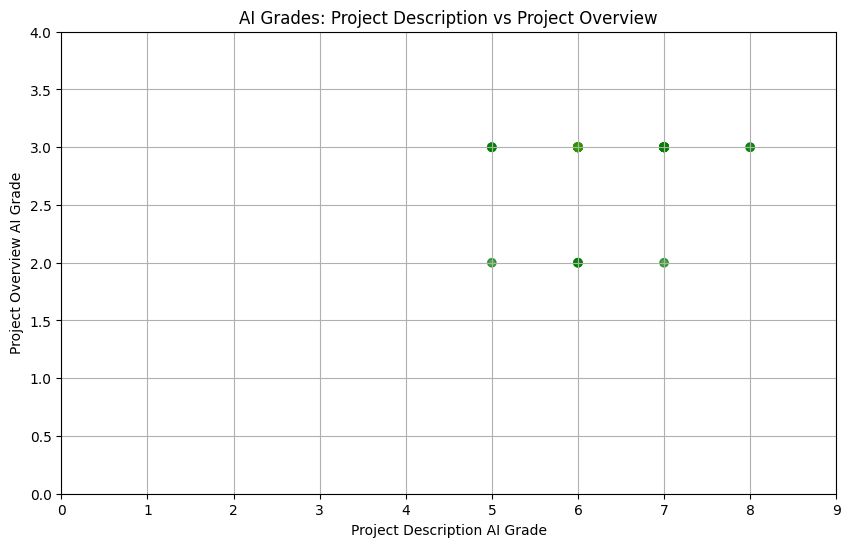

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_section_grades(section1, section2, csv_file='56_files_pred_true_version3.csv'):
    """
    Function to plot AI grades for two sections and color based on Real_Grade.
    
    Parameters:
    section1 (str): The first section name.
    section2 (str): The second section name.
    csv_file (str): The path to the CSV file containing the data.
    
    Returns:
    None
    """
    # Read the CSV file
    result_df = pd.read_csv(csv_file)
    
    # Rename columns
    result_df.rename(columns={'score': 'Real_Grade', 'long_description': 'Criteria'}, inplace=True)
    
    # Filter data for the specified sections
    filtered_df = result_df[result_df['Section'].isin([section1, section2])]
    
    # Pivot the DataFrame to have AI grades for the specified sections
    pivot_df = filtered_df.pivot(index='user_id', columns='Section', values='AI_Grade')
    
    # Drop rows with missing values
    pivot_df.dropna(inplace=True)
    
    # Merge the Real_Grade column back to the pivoted DataFrame
    real_grades = filtered_df.pivot(index='user_id', columns='Section', values='Real_Grade')
    pivot_df = pivot_df.merge(real_grades, on='user_id', suffixes=('_AI', '_Real'))
    
    # Define colors based on Real_Grade for the specified sections
    def get_color(row):
        if row[f'{section1}_Real'] == 1 and row[f'{section2}_Real'] == 1:
            return 'green'
        elif row[f'{section1}_Real'] == 1 or row[f'{section2}_Real'] == 1:
            return 'yellow'
        elif row[f'{section1}_Real'] == 0 and row[f'{section2}_Real'] == 0:
            return 'red'
        else:
            return 'gray'
    
    pivot_df['color'] = pivot_df.apply(get_color, axis=1)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(pivot_df[f'{section1}_AI'], pivot_df[f'{section2}_AI'], c=pivot_df['color'], alpha=0.7)
    plt.title(f'AI Grades: {section1} vs {section2}')
    plt.xlabel(f'{section1} AI Grade')
    plt.ylabel(f'{section2} AI Grade')
    plt.xlim(0, pivot_df[f'{section1}_AI'].max() + 1)
    plt.ylim(0, pivot_df[f'{section2}_AI'].max() + 1)
    plt.grid(True)
    plt.show()

# Example usage
plot_section_grades('Project Description', 'Project Overview')

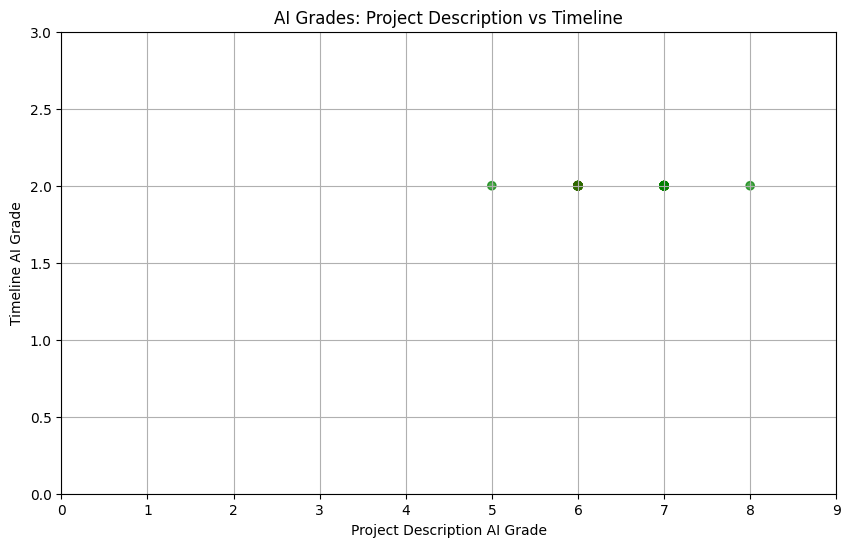

In [53]:
plot_section_grades('Project Description', 'Timeline')

### Histogram of AI score for each section

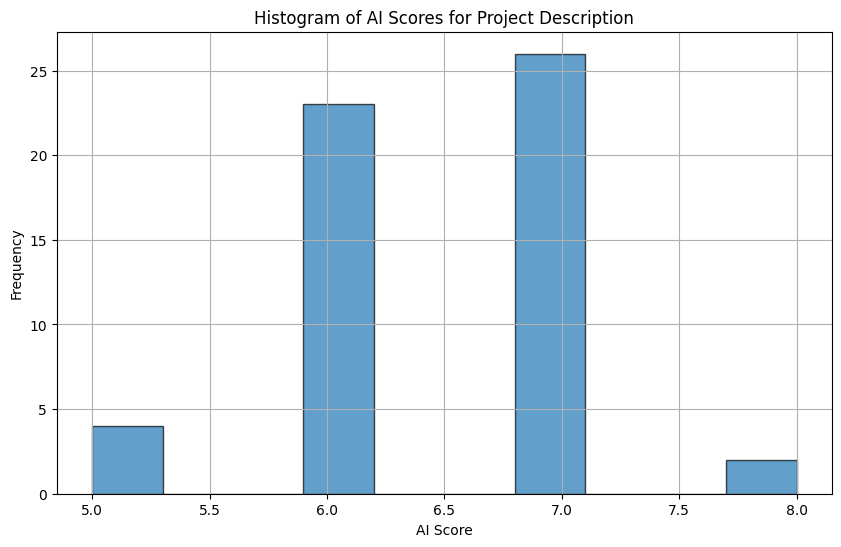

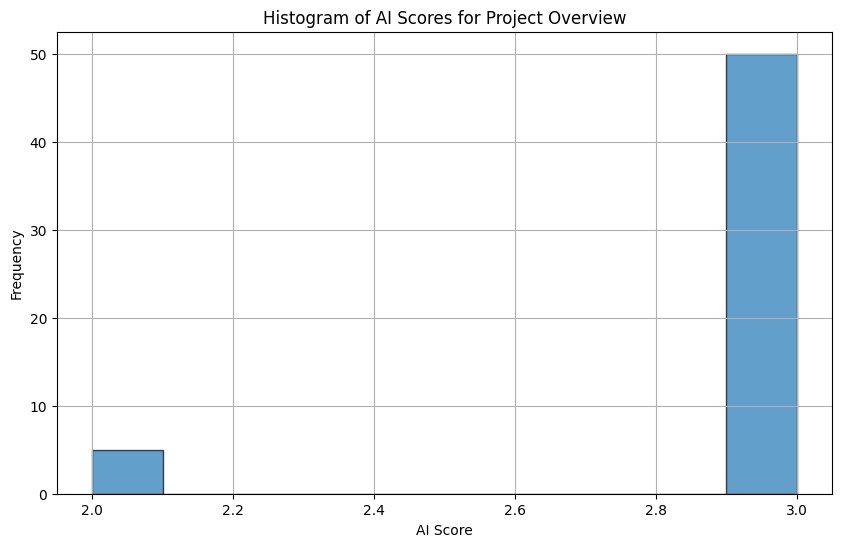

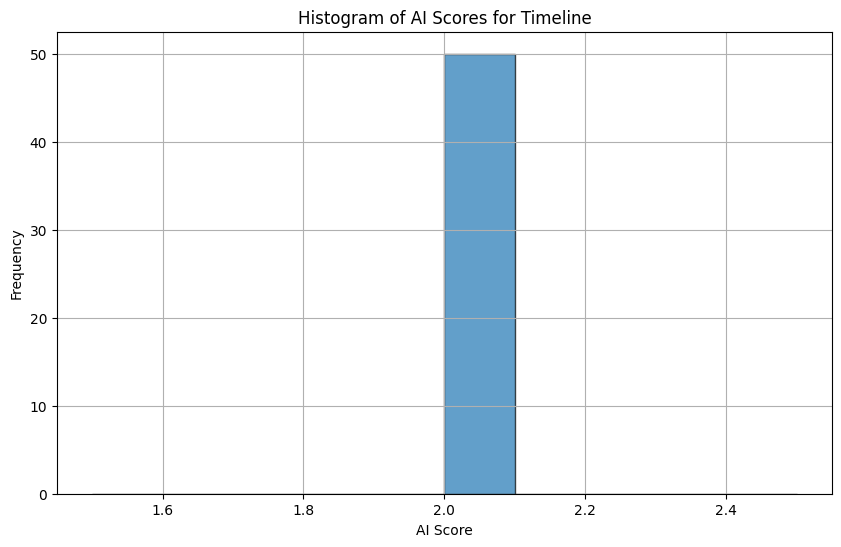

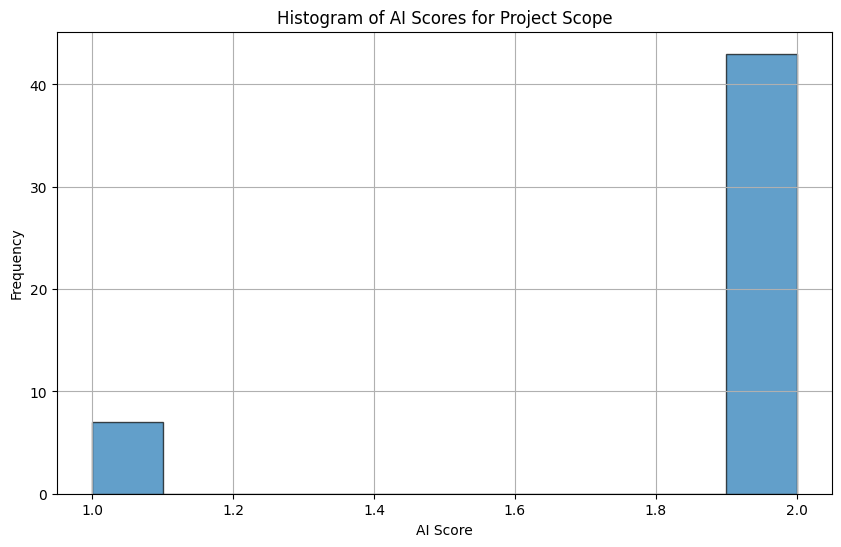

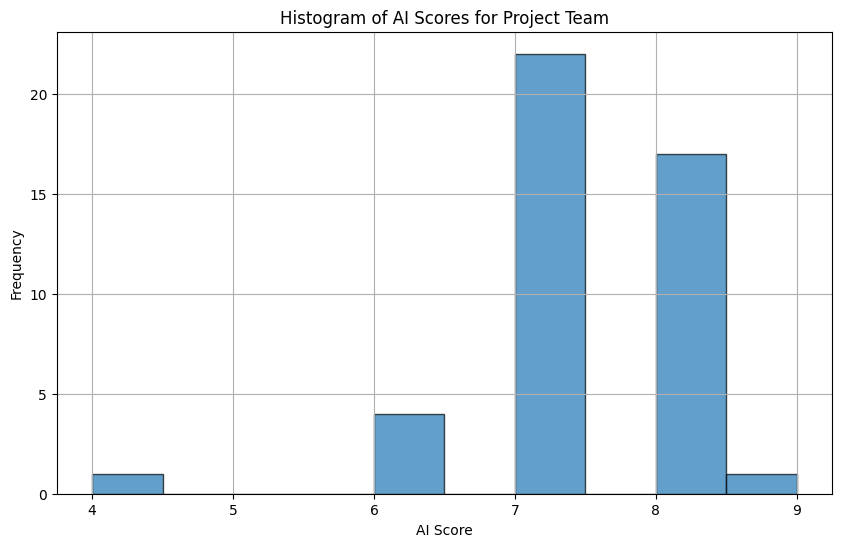

In [54]:
# Read the CSV file
result_df = pd.read_csv('56_files_pred_true_version3.csv')

# Rename columns
result_df.rename(columns={'score': 'Real_Grade', 'long_description': 'Criteria'}, inplace=True)

def plot_section_histogram(section, df):
    """
    Function to plot a histogram of AI scores for a given section.
    
    Parameters:
    section (str): The section name.
    df (pd.DataFrame): The DataFrame containing the data.
    
    Returns:
    None
    """
    # Filter data for the specified section
    section_df = df[df['Section'] == section]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(section_df['AI_Grade'], bins=10, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of AI Scores for {section}')
    plt.xlabel('AI Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_section_histogram('Project Description', result_df)
plot_section_histogram('Project Overview', result_df)
plot_section_histogram('Timeline', result_df)
plot_section_histogram('Project Scope', result_df)
plot_section_histogram('Project Team', result_df)

### AI difference for pass and fail submissions

In [55]:
def visualize_difference_between_AI_and_Real_Grade(section, max_grade):
    description_df = visualize_df[visualize_df['Section'] == section]
    description_df =   description_df[description_df['AI_Grade'] <= max_grade] 
    # Separate the data into two DataFrames based on RealGrade
    real_grade_0 = description_df[description_df['Real_Grade'] == 0]
    real_grade_1 = description_df[description_df['Real_Grade'] == 1]

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    fig.suptitle('Difference between AI and Real Grade for Section ' + section, fontsize=20)
    # Scatter plot for RealGrade = 0
    sns.scatterplot(ax=axes[0], x=real_grade_0.index, y=real_grade_0['AI_Grade'], color='blue')
    axes[0].set_title('AI grade when RealGrade = 0')
    axes[0].set_xlabel('Submission Index')
    axes[0].set_ylabel('AI grade')

    # Scatter plot for RealGrade = 1
    sns.scatterplot(ax=axes[1], x=real_grade_1.index, y=real_grade_1['AI_Grade'], color='green')
    axes[1].set_title('AI grade when RealGrade = 1')
    axes[1].set_xlabel('Submission Index')



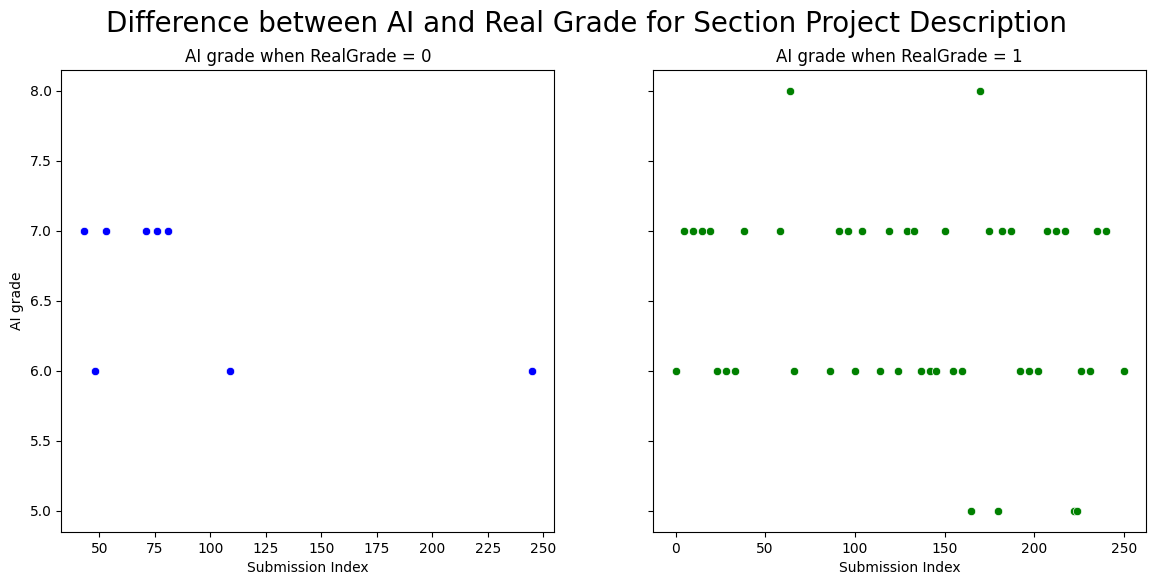

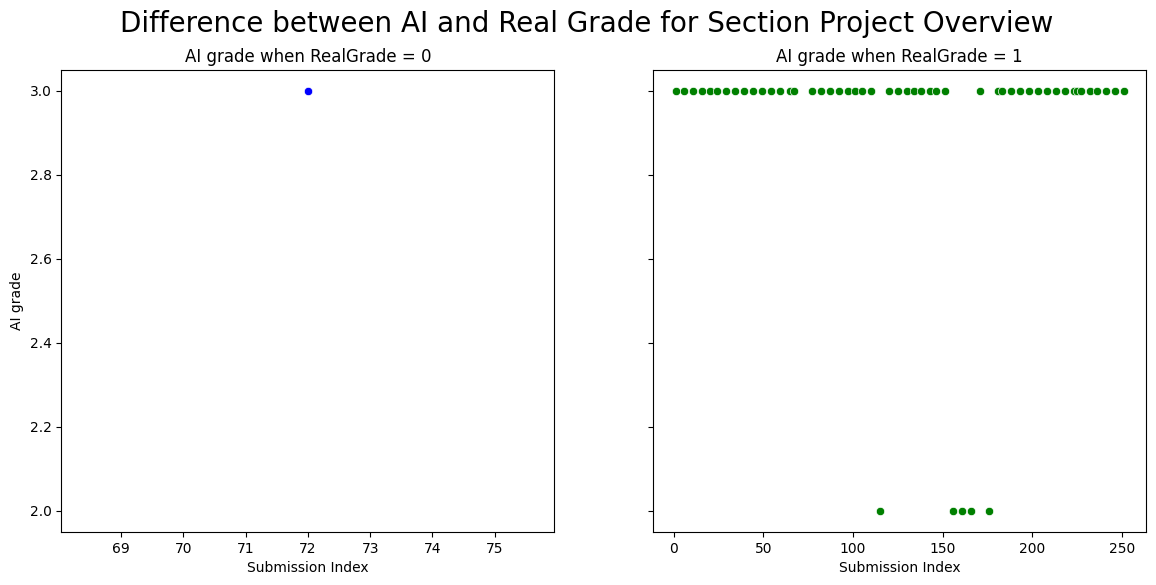

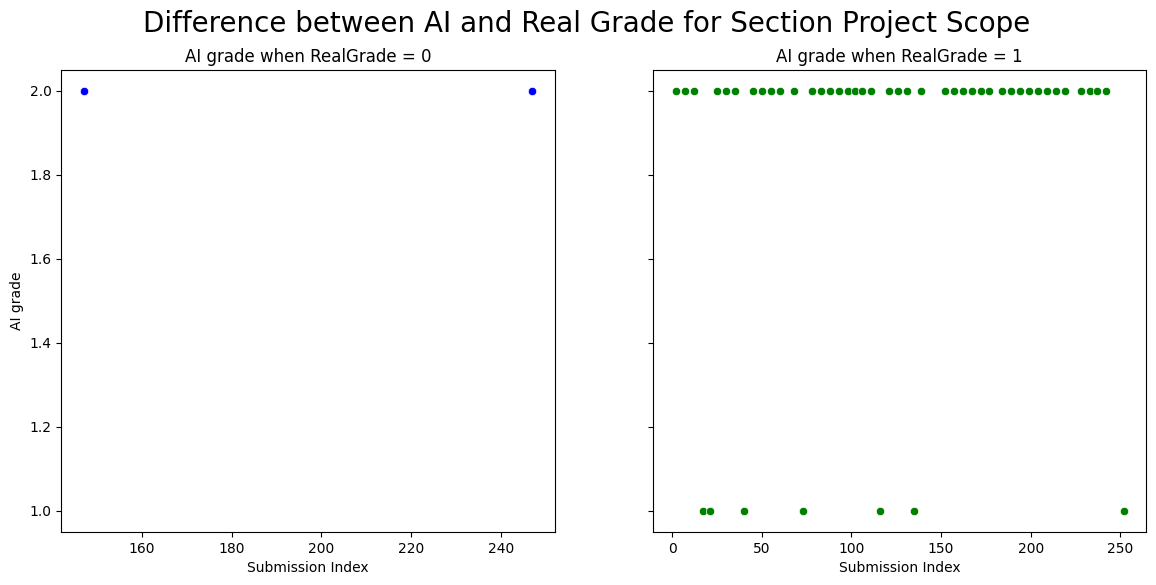

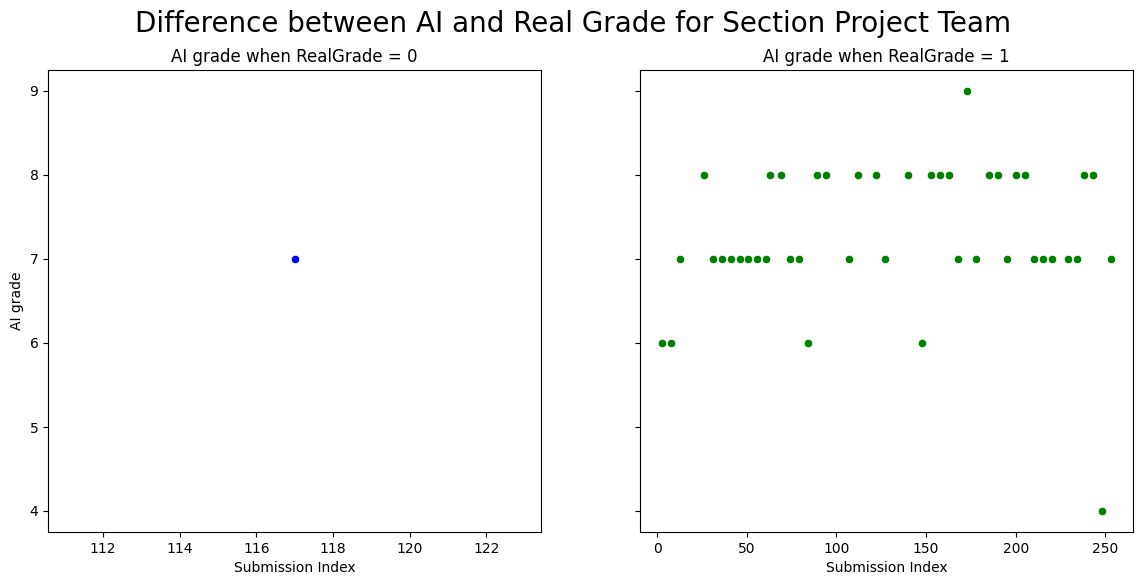

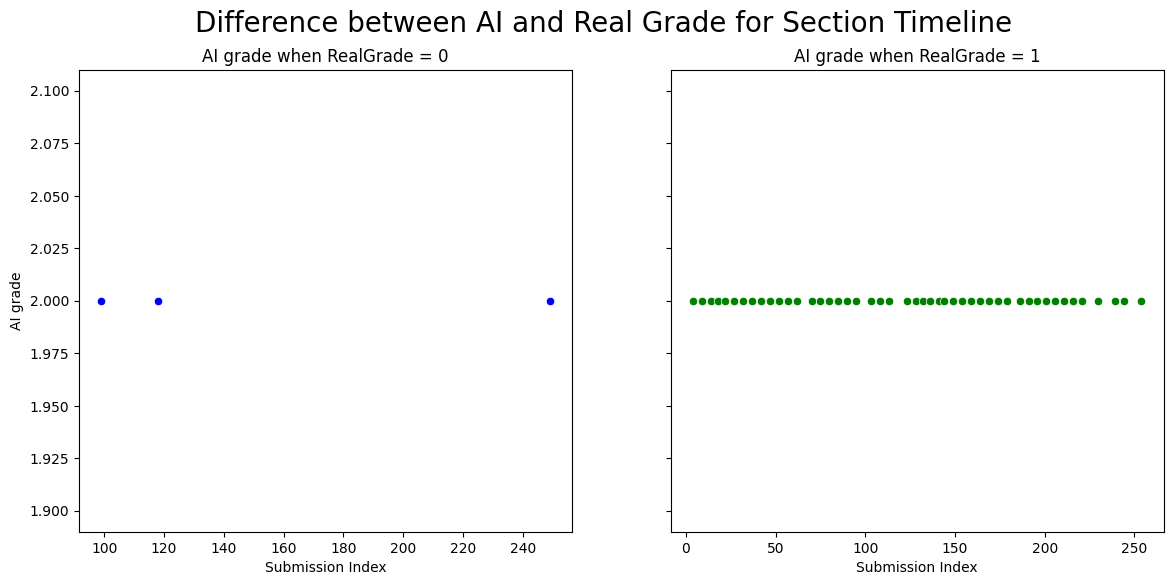

In [56]:
sections = visualize_df['Section'].unique().tolist()
max_grade_map = {
    'Project Description': 25,
    'Project Overview': 25,
    'Timeline': 20,
    'Project Scope': 15,
    'Project Team': 15,
}
for section in sections:
    visualize_difference_between_AI_and_Real_Grade(section, max_grade_map[section])

### Visualize AI Grade only

In [57]:
section_name_map = {
        "Project Description / Purpose": "Project Description",
        "Project Overview": "Project Overview",
        "Timeline": "Timeline",
        "Project Scope": "Project Scope",
        "Project Team": "Project Team"
    }

test_results = pd.read_csv('test_results/test_result_on_56_files_0_1.csv', index_col=0).reset_index(drop=True)
test_results = test_results.rename(columns={'File_Name': 'user_id'})
test_results['Section'] = test_results['Section'].replace(section_name_map)
test_results

,user_id,AI_Grade,Comment,Section,Criteria
0,593636371,1,The value 'PRAPARE' exists in the file.,Project Description,Question 1. Does the value of the 'Project Nam...
1,593636371,1,The value 'EMPACT-Suicide Prevention Center' e...,Project Description,Question 2. Does the value of the 'Clinic:' at...
2,593636371,1,The value 'Implementation of PRAPARE Screening...,Project Description,Question 3. Does the value of the 'Process:' a...
3,593636371,1,The value 'Adult BH. 1.C. The organization’s r...,Project Description,Question 4. Does the value of the 'TIP 2.0 Pro...
4,593636371,0,The value does not provide specific process mi...,Project Description,Question 5. Does the value of the 'TIP 2.0 Pro...
...,...,...,...,...,...
1159,596799191,0,The value of the 'Process Manager:' attribute ...,Project Team,Question 4. Does the value of the 'Process Man...
1160,596799191,1,The value of the 'Stakeholders' stakeholder at...,Project Team,Question 5. Does the value of the 'Stakeholder...
1161,596799191,1,"The values for 'Title', 'Department', and 'Org...",Project Team,Question 6. Does the the value of the 'Stakeho...
1162,596799191,1,The value of the 'Project Team Members' Name a...,Project Team,Question 7. Does the value of the 'Project Tea...


In [58]:
real_results = pd.read_csv('auto_grading_trainingset/TIPQIC_project_charter_submission_merged.csv', index_col=0).reset_index(drop=True)
real_results = real_results.rename(columns={'description': 'Section'})
real_results

,user_id,attachment_url,section_id,score,grader_comment,Section,long_description,grader_name
0,593636370,https://canvas.instructure.com/files/259623362...,_7292,1.0,"I see the identified project name, facility, p...",Process Milestone,Identifies the process milestone target for th...,Kailey Love
1,593636370,https://canvas.instructure.com/files/259623362...,_4258,1.0,I see a clear project description and purpose ...,Project Description,Includes a brief description of the project.<b...,Kailey Love
2,593636370,https://canvas.instructure.com/files/259623362...,_4499,1.0,I see a detailed problem summary with appropri...,Project Overview,Describes problem or performance gap with desc...,Kailey Love
3,593636370,https://canvas.instructure.com/files/259623362...,_3182,1.0,I see feasible and appropriate steps related t...,Timeline,Lists each key task and planned completion dates.,Kailey Love
4,593636370,https://canvas.instructure.com/files/259623362...,_5706,1.0,I see clear scope objectives and a clear scope...,Project Scope,Explains objectives that are in scope.<br/>\r\...,Kailey Love
...,...,...,...,...,...,...,...,...
1075,604016476,https://canvas.instructure.com/files/260432284...,_4258,1.0,I see a clear project description and purpose ...,Project Description,Includes a brief description of the project.<b...,Phelene de Vries Stoutt
1076,604016476,https://canvas.instructure.com/files/260432284...,_4499,1.0,I see a detailed problem summary with appropri...,Project Overview,Describes problem or performance gap with desc...,Phelene de Vries Stoutt
1077,604016476,https://canvas.instructure.com/files/260432284...,_3182,1.0,I see feasible and appropriate steps related t...,Timeline,Lists each key task and planned completion dates.,Phelene de Vries Stoutt
1078,604016476,https://canvas.instructure.com/files/260432284...,_5706,1.0,I see clear scope objectives and a clear scope...,Project Scope,Explains objectives that are in scope.<br/>\r\...,Phelene de Vries Stoutt


In [59]:
merged_df = pd.merge(test_results, real_results[['user_id', 'Section', 'score']], on=['user_id', 'Section'], how='left')
merged_df = merged_df.rename(columns={'score': 'Real_Grade'})
merged_df

,user_id,AI_Grade,Comment,Section,Criteria,Real_Grade
0,593636371,1,The value 'PRAPARE' exists in the file.,Project Description,Question 1. Does the value of the 'Project Nam...,1.0
1,593636371,1,The value 'EMPACT-Suicide Prevention Center' e...,Project Description,Question 2. Does the value of the 'Clinic:' at...,1.0
2,593636371,1,The value 'Implementation of PRAPARE Screening...,Project Description,Question 3. Does the value of the 'Process:' a...,1.0
3,593636371,1,The value 'Adult BH. 1.C. The organization’s r...,Project Description,Question 4. Does the value of the 'TIP 2.0 Pro...,1.0
4,593636371,0,The value does not provide specific process mi...,Project Description,Question 5. Does the value of the 'TIP 2.0 Pro...,1.0
...,...,...,...,...,...,...
1159,596799191,0,The value of the 'Process Manager:' attribute ...,Project Team,Question 4. Does the value of the 'Process Man...,1.0
1160,596799191,1,The value of the 'Stakeholders' stakeholder at...,Project Team,Question 5. Does the value of the 'Stakeholder...,1.0
1161,596799191,1,"The values for 'Title', 'Department', and 'Org...",Project Team,Question 6. Does the the value of the 'Stakeho...,1.0
1162,596799191,1,The value of the 'Project Team Members' Name a...,Project Team,Question 7. Does the value of the 'Project Tea...,1.0


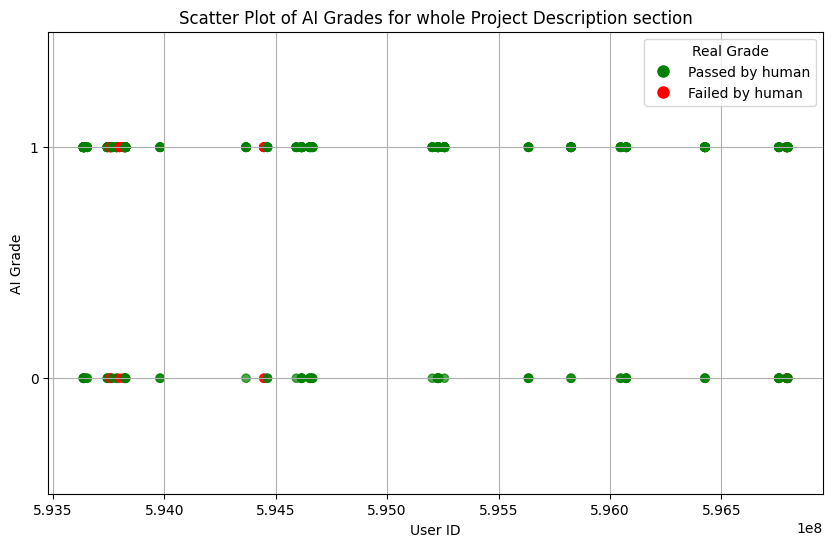

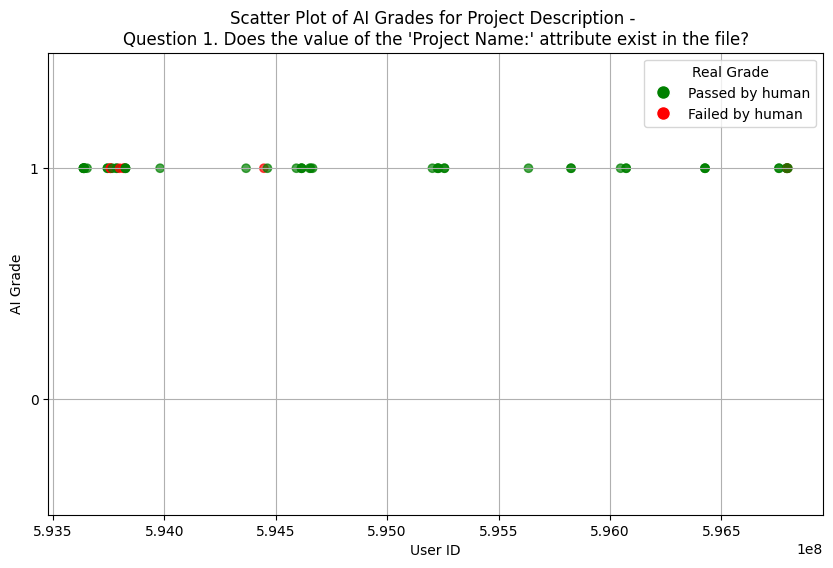

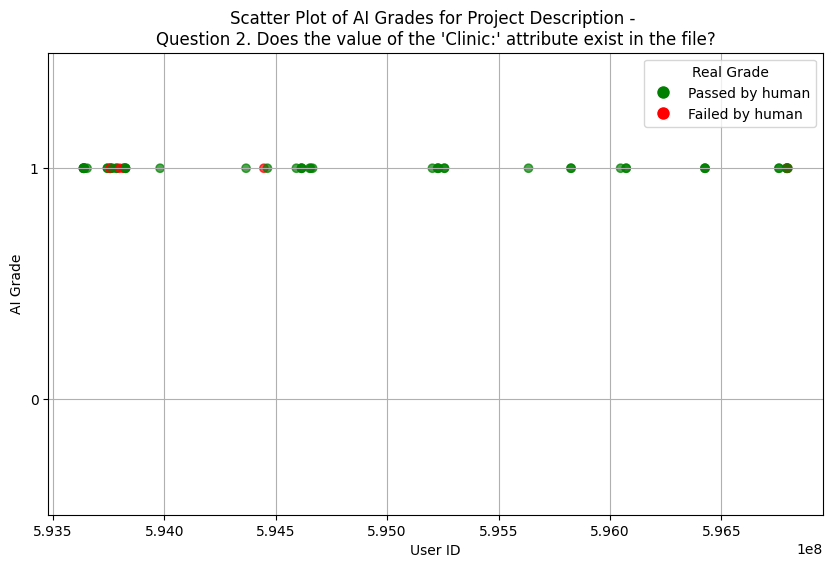

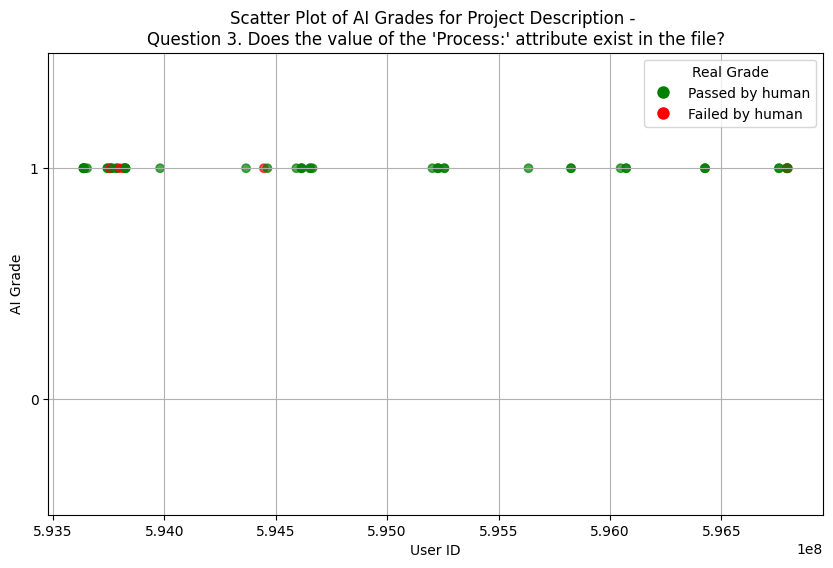

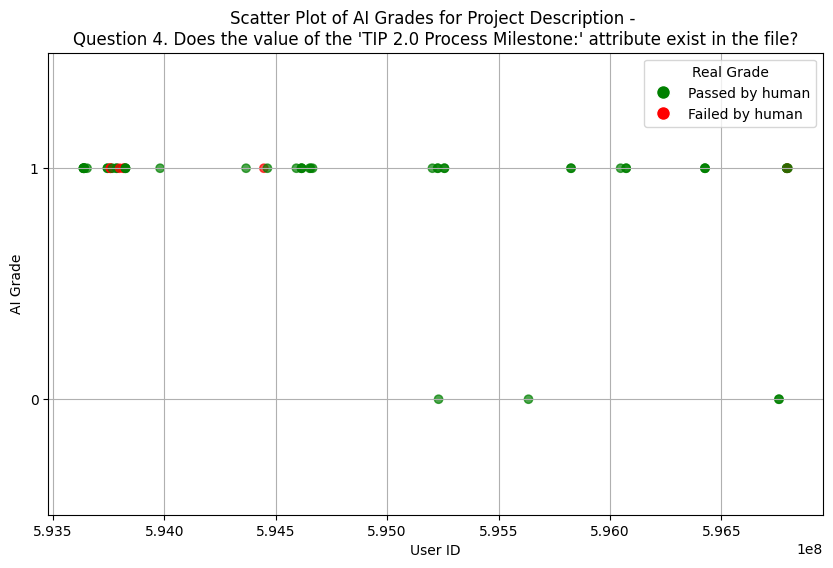

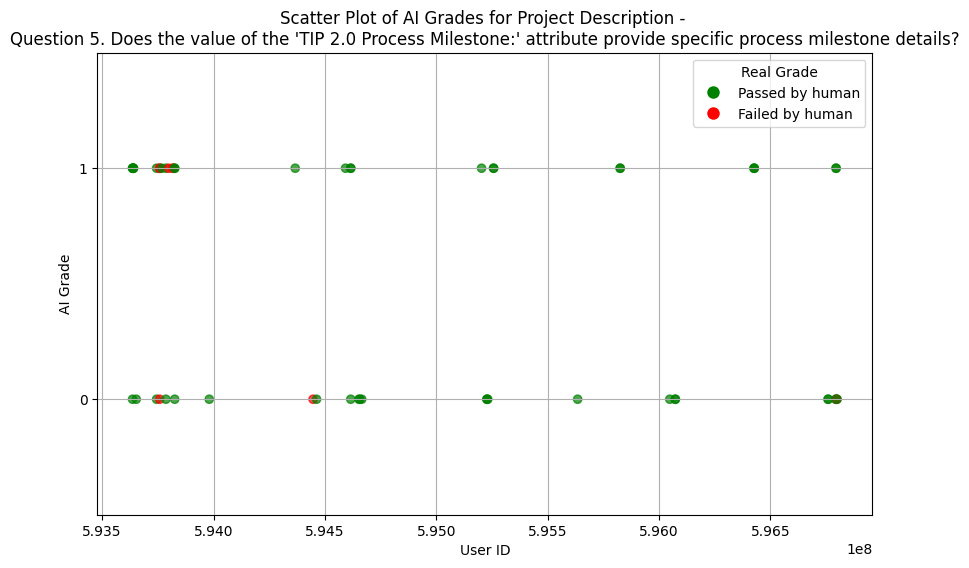

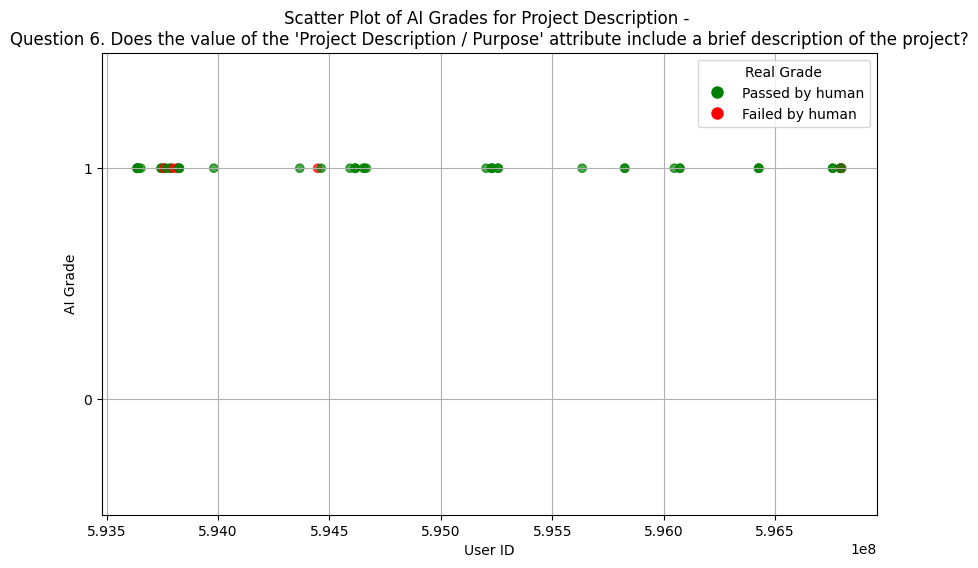

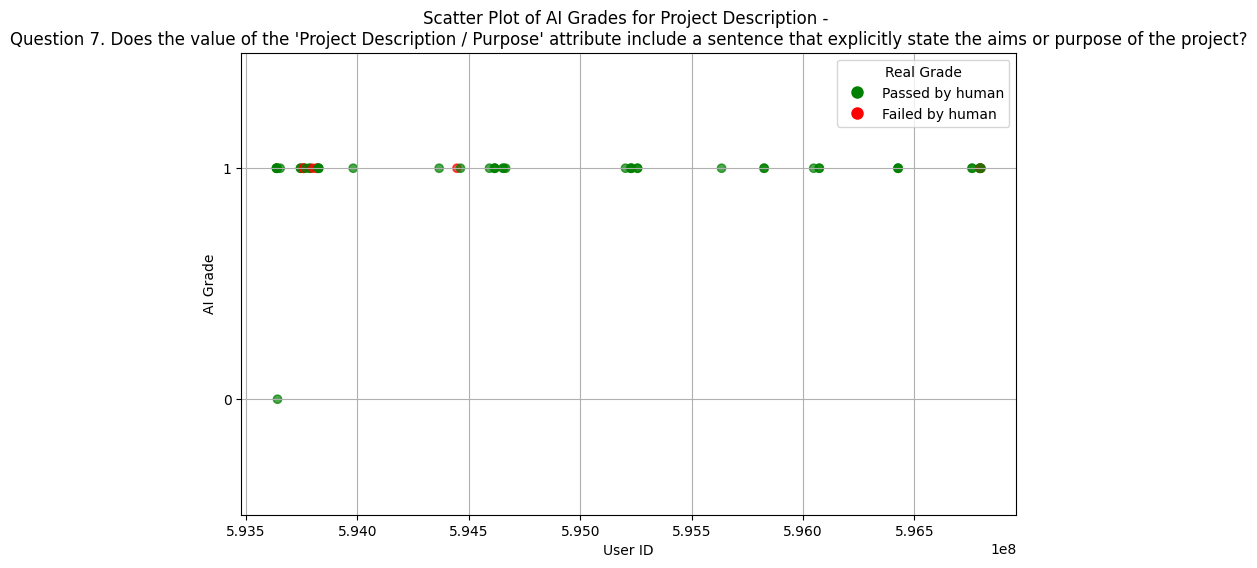

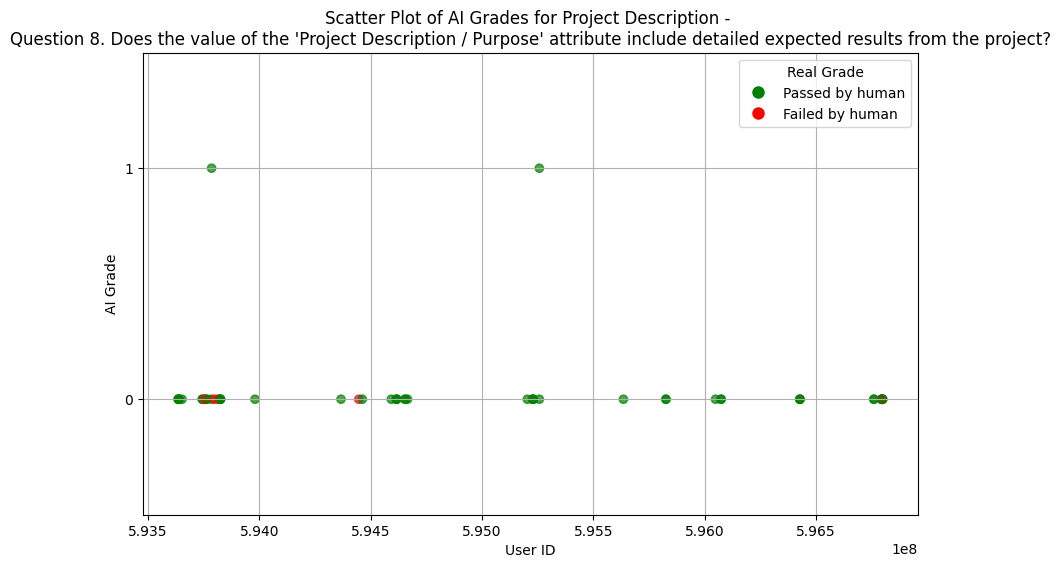

In [120]:
def plot_section_criteria_scatter(section, df):
    """
    Function to plot scatter plots of AI grades for each criteria within a given section.
    
    Parameters:
    section (str): The section name.
    df (pd.DataFrame): The DataFrame containing the data.
    
    Returns:
    None
    """
    # Filter data for the specified section
    section_df = df[df['Section'] == section]
    
    # Get unique criteria for the section
    unique_criteria = section_df['Criteria'].unique()
    colors = section_df['Real_Grade'].apply(lambda x: 'green' if x == 1 else 'red')
    plt.figure(figsize=(10, 6))
    plt.scatter(section_df['user_id'], section_df['AI_Grade'], c=colors, alpha=0.7)
    plt.title(f'Scatter Plot of AI Grades for whole {section} section')
    plt.xlabel('User ID')
    plt.ylabel('AI Grade')
    plt.ylim(-0.5, 1.5)
    plt.yticks([0, 1])
    plt.grid(True)
    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Passed by human'),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Failed by human')]
    plt.legend(handles=handles, title='Real Grade')
    plt.show()
    
    # Plot scatter plot for each criteria
    for criteria in unique_criteria:
        criteria_df = section_df[section_df['Criteria'] == criteria]
        colors = criteria_df['Real_Grade'].apply(lambda x: 'green' if x == 1 else 'red')
        plt.figure(figsize=(10, 6))
        plt.scatter(criteria_df['user_id'], criteria_df['AI_Grade'], c=colors, alpha=0.7)
        plt.title(f'Scatter Plot of AI Grades for {section} - \n{criteria}')
        plt.xlabel('User ID')
        plt.ylabel('AI Grade')
        plt.ylim(-0.5, 1.5)
        plt.yticks([0, 1])
        plt.grid(True)
        # Create a legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Passed by human'),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Failed by human')]
        plt.legend(handles=handles, title='Real Grade')
        plt.show()

# Example usage
plot_section_criteria_scatter('Project Description', merged_df)

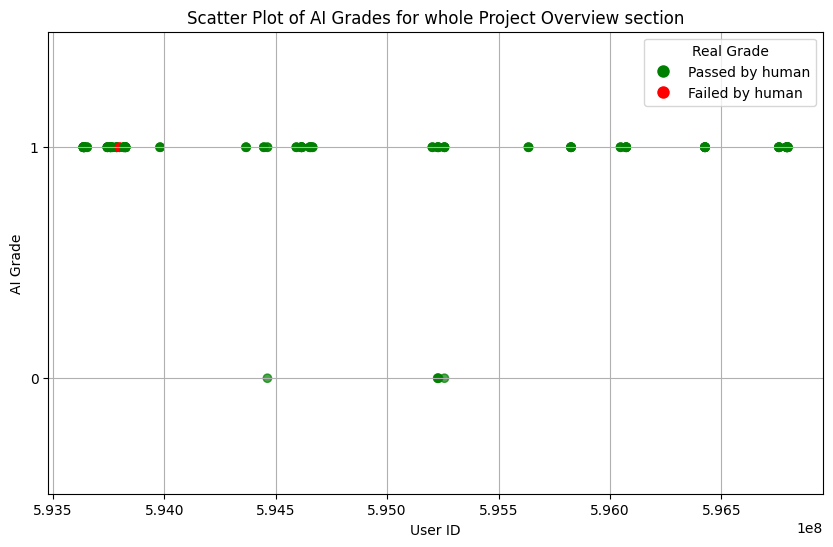

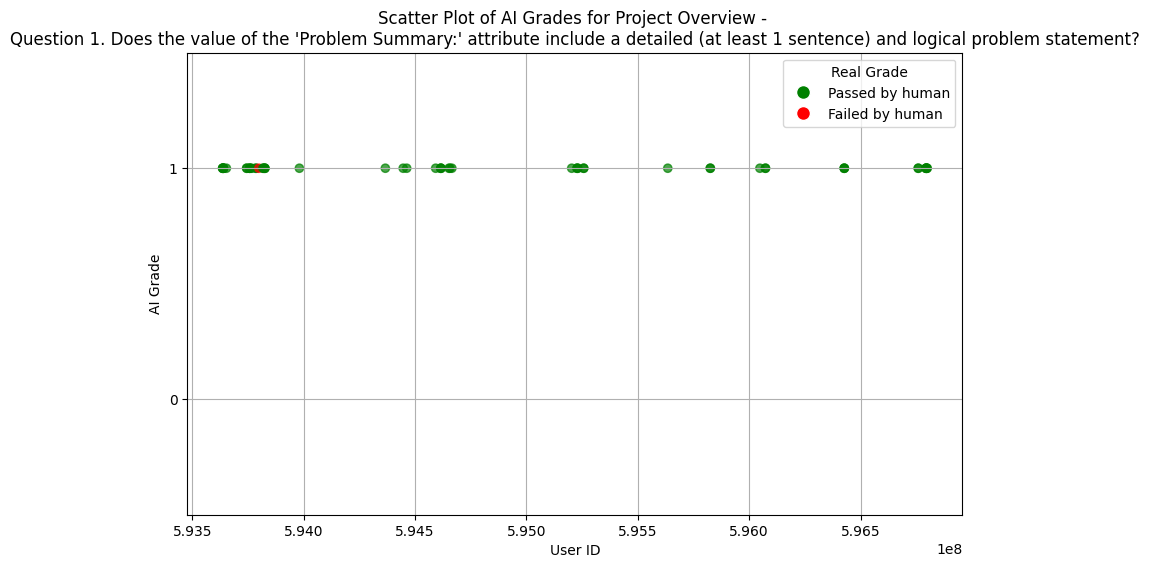

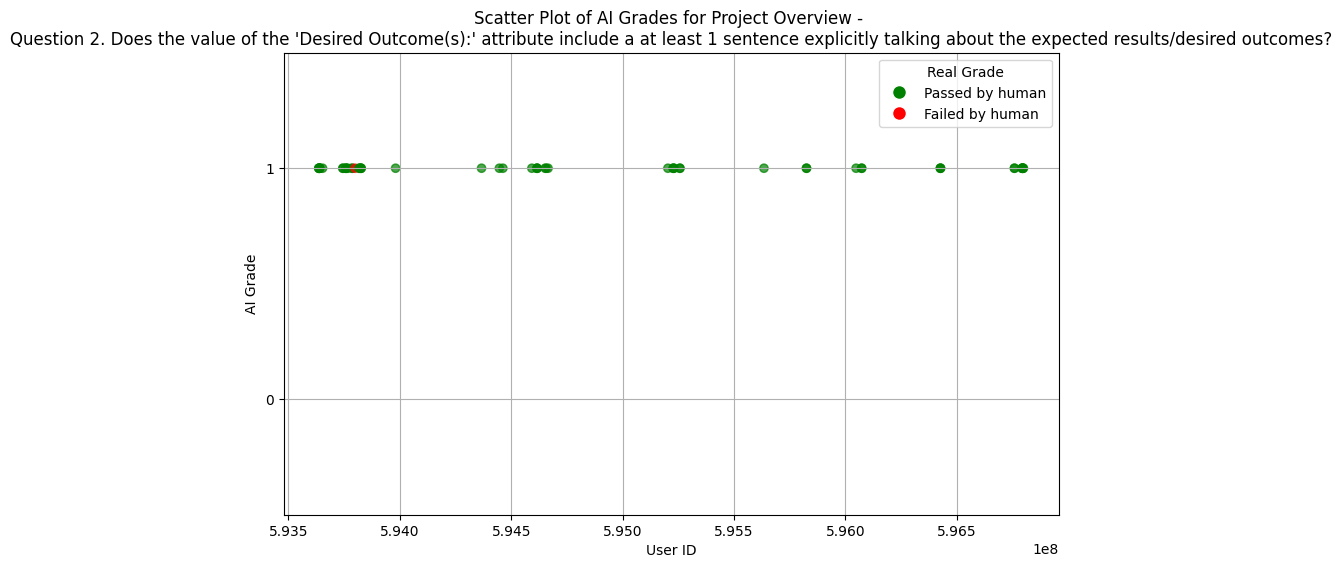

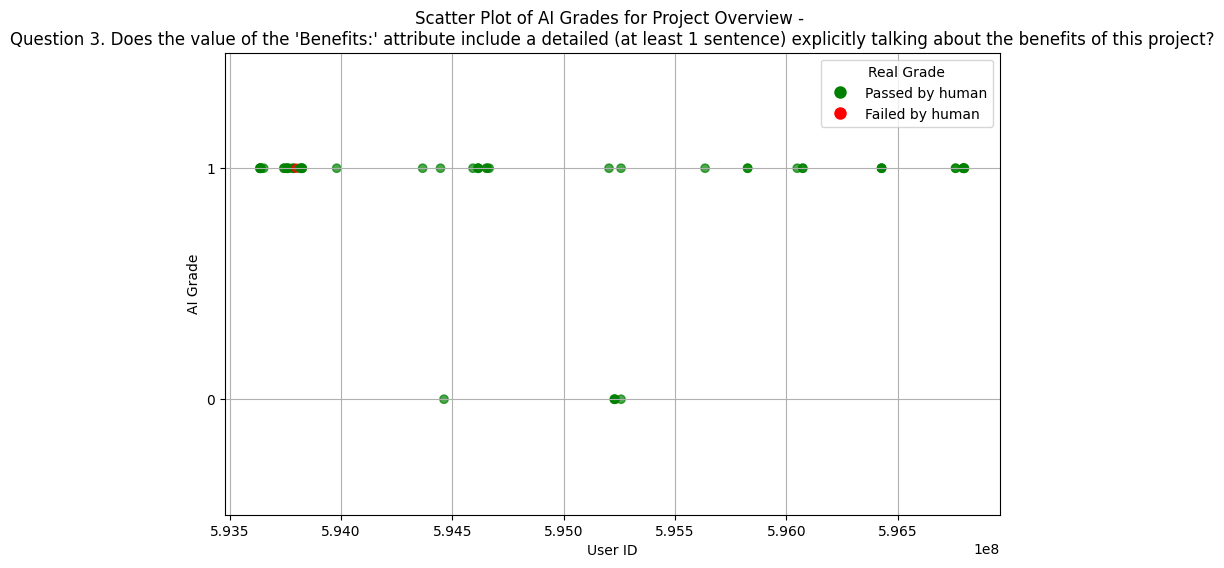

In [121]:
plot_section_criteria_scatter('Project Overview', merged_df)